# Problem 1

In [1]:
install.packages(c("boot","msm","dplyr")) #We start by installing and loading necessary packages
library(boot)
library(msm)
library(dplyr)
library(broom)

Installing packages into 'C:/Users/Honza/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'boot' successfully unpacked and MD5 sums checked
package 'msm' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'msm'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Honza\Documents\R\win-library\3.6\00LOCK\msm\libs\x64\msm.dll to C:\Users\Honza\Documents\R\win-library\3.6\msm\libs\x64\msm.dll: Permission denied"Warning message:
"restored 'msm'"

package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Honza\AppData\Local\Temp\RtmpSYgbZm\downloaded_packages


Warning message:
"package 'boot' was built under R version 3.6.3"Warning message:
"package 'msm' was built under R version 3.6.3"
Attaching package: 'msm'

The following object is masked from 'package:boot':

    cav

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'broom' was built under R version 3.6.3"

In [30]:
library(boot)
data(city)
data <- city
data
#data <- data(city) #we load the data
#data #let's take a look, dataset is so small that we can view it as a whole

u,x
138,143
93,104
61,69
179,260
48,75
37,63
29,50
23,48
30,111
2,50


[1] 93

## a) Draw the dependence between $u_i$ and $x_i$

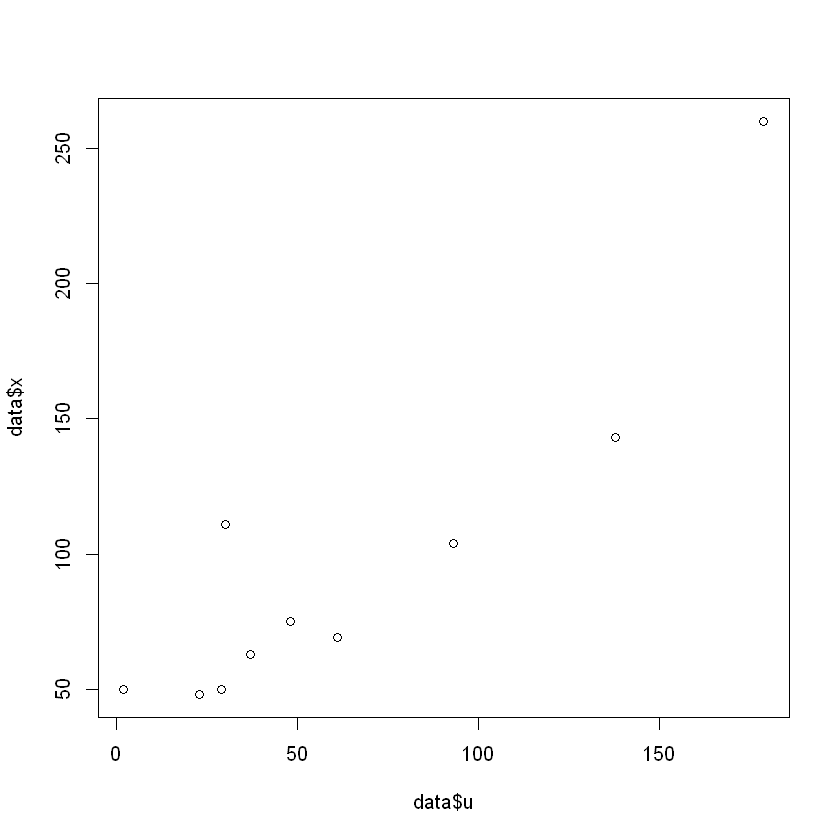

In [3]:
plot(data$u, data$x)

## b) Estimate the value of R from the random sample.

In [4]:
R = mean(data$x)/mean(data$u)
R

[1] 1.520312

# c)

We start by using "brute force".

We allow for values of x and u to not correspond - clearly wrong

In [41]:
# brute force bootstraping
Boot    = 999
x.boot = rep(0, Boot)
u.boot = rep(0, Boot)

set.seed(42)
for(i in 1:Boot) {
  x.sample <- sample(data$x, nrow(data), replace = TRUE)
  x.boot[i] <- mean(x.sample)
  u.sample <- sample(data$u, nrow(data), replace = TRUE)
  u.boot[i] <- mean(u.sample)
}

In [42]:
g <- x.boot/u.boot
R_bf = mean(g) #bf stands for brute force
sprintf("Bootstrap estimate of R: %.4f", R_bf)

[1] "Bootstrap estimate of R: 1.6453"

values of x and u must correspond - it makes sense

In [48]:
# brute force bootstraping
Boot    = 999
x.boot = rep(0, Boot)
u.boot = rep(0, Boot)

set.seed(42)
for(i in 1:Boot) {
  sample_data <- sample_n(data, nrow(data), replace = TRUE)
  x.boot[i] <- mean(sample_data$x)
  u.boot[i] <- mean(sample_data$u)
}

In [55]:
# brute force bootstraping
Boot    = 999
x.boot = rep(0, Boot)
u.boot = rep(0, Boot)
sample_x = rep(0, nrow(data))
g = rep(0,Boot)
set.seed(42)
for(i in 1:Boot) {
  sample_u <- sample(data$u, nrow(data), replace = TRUE)
  for(a in 1:length(sample_u)) {
      for(b in 1:nrow(data)) {
          if(sample_u[a] == data[b,1]){
              sample_x[a] <- data[b,2]
          }
      }
  }
  x.boot[i] <- mean(sample_x)
  u.boot[i] <- mean(sample_u)
  g[i] <- x.boot[i]/u.boot[i]
}
length(sample_x)
length(sample_u)
sample_u
sample_x

[1] 10

[1] 10

[1] 179  29  23  93   2  23  30  37  93 179

[1] 260  50  48 104  50  48 111  63 104 260

In [56]:

R_bf = mean(g) #bf stands for brute force
R_bf_se = sd(g)
sprintf("Bootstrap estimate of R: %.10f", R_bf)
sprintf("Bootstrap standard error for R: %.4f", R_bf_se)

[1] "Bootstrap estimate of R: 1.5690422466"

[1] "Bootstrap standard error for R: 0.2330"

We continue by using 'boot' package

We allow for values of x and u to not correspond

In [57]:
# now, using the "boot" package
Boot = 999
mean.boot = function(data, idx) {
  out = mean(data$x[idx])/mean(data$u[idx])
  out
}


set.seed(42)
data.boot <- boot(data, statistic = mean.boot, R = Boot)
summary(data.boot)
data.boot

tidy(data.boot)
tidy(data.boot)[1]+tidy(data.boot)[2]
data.boot$t - g


          Length Class      Mode     
t0          1    -none-     numeric  
t         999    -none-     numeric  
R           1    -none-     numeric  
data        2    data.frame list     
seed      626    -none-     numeric  
statistic   1    -none-     function 
sim         1    -none-     character
call        4    -none-     call     
stype       1    -none-     character
strata     10    -none-     numeric  
weights    10    -none-     numeric  


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data, statistic = mean.boot, R = Boot)


Bootstrap Statistics :
    original     bias    std. error
t1* 1.520312 0.05498203   0.2531078

statistic,bias,std.error
1.520312,0.05498203,0.2531078


statistic
1.575295


0.198678029
-0.304528756
-0.042199613
0.604107143
0.768040638
0.065446977
-0.241539763
0.302814376
-0.007084353
-0.157840039
-0.161125993


In [20]:
?sample()

In [11]:
?set.seed()

# Problem 3

In [12]:
install.packages(c("readr","tseries","gmm")) #necessary packages
library(readr) #so that we can load the data
library(tseries)
library(gmm)

Installing packages into 'C:/Users/Honza/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'readr' successfully unpacked and MD5 sums checked
package 'tseries' successfully unpacked and MD5 sums checked
package 'gmm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Honza\AppData\Local\Temp\RtmpSYgbZm\downloaded_packages


Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'tseries' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Warning message:
"package 'gmm' was built under R version 3.6.3"Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.6.3"

In [13]:
data3 <- read_csv("hw2_data.csv")
head(data3)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  x = col_double()
)



x
1.1964116
0.9136624
0.7950761
1.8208410
1.5416703
-0.3024855


In [14]:
install.packages("rlang")

Installing package into 'C:/Users/Honza/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Honza\Documents\R\win-library\3.6\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\Honza\Documents\R\win-library\3.6\rlang\libs\x64\rlang.dll: Permission denied"Warning message:
"restored 'rlang'"


The downloaded binary packages are in
	C:\Users\Honza\AppData\Local\Temp\RtmpSYgbZm\downloaded_packages
